<a href="https://colab.research.google.com/github/Sujalg1994/Alma-better/blob/main/Netflix_Movies_and_Tv_shows_AAa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name : Netflix movies and tv show clustering **

**Project Type: Unsupervised Learning**

Name :- Sanket C Sakhare,
        Pradip Godase

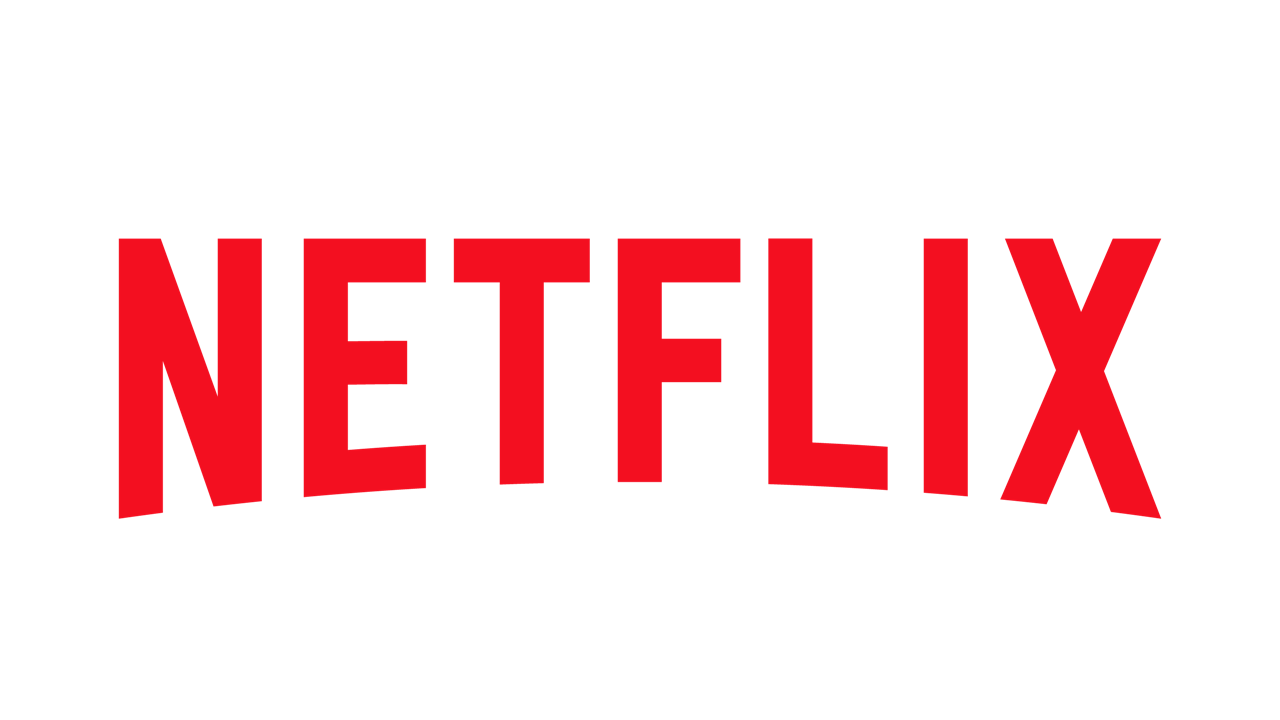

**Introduction:**

**With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.**

##**Index:**

**1.   Problem statement and their attributes**

**2.   Importing the libraries and the dataset**

**3.   Understanding Variables**

**4.   Checking for missing values and cleaning the data**

**5.   Exploratory data analysis**

**6.   Handling Outliers**

**7.   Data preprocessing**

**8.   Model implementation**

**9.   Building content based recommender system**

**10.   Summary and Conclusions**




#**1. Problem Statement**

**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# 1.1. Attribute Information:
Show_id : Unique ID for every Movie / Tv Show

Type : Identifier - A Movie or TV Show

Title : Title of the Movie / Tv Show

Director : Director of the Movie

Cast : Actors involved in the movie / show

Country : Country where the movie / show was produced

Date_added : Date it was added on Netflix

Release_year : Actual Releaseyear of the movie / show

Rating : TV Rating of the movie / show

Duration : Total Duration - in minutes or number of seasons

Listed_in : Genere

Description: The Summary description

#**2. Importing required libraries and the dataset**

In [ ]:
#Download and install required package
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
pip install geopandas

In [ ]:
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

#import stats module
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

#import warnings
import warnings
warnings.filterwarnings('ignore')

###**2.1. Load the dataset and print the shape of the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Alma-better Data Sets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is 7787 rows and 12 columns


###**2.2. Print the first and last 3 rows of all columns**

In [ ]:
df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [ ]:
df.tail(3)

show_id     type                                    title  director  \
7784   s7785    Movie                        Zulu Man in Japan       NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts       NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Sam Dunn   

                            cast                                country  \
7784                     Nasty C                                    NaN   
7785  Adriano Zumbo, Rachel Khoo                              Australia   
7786                         NaN  United Kingdom, Canada, United States   

              date_added  release_year rating  duration  \
7784  September 25, 2020          2019  TV-MA    44 min   
7785    October 31, 2020          2019  TV-PG  1 Season   
7786       March 1, 2020          2019  TV-MA    90 min   

                                              listed_in  \
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

#**3. Understanding Variables**

In [ ]:
columns=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']

#for loop to count different values in the dataset
for c in df[columns]:
    print("---- %s ---" % c)
    print(df[c].value_counts())
    print('\n')

df[columns].apply(lambda x: x.value_counts()).T.stack()

---- show_id ---
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64


---- type ---
Movie      5377
TV Show    2410
Name: type, dtype: int64


---- title ---
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64


---- director ---
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                   

show_id      s1                                                                                                                                                          1.0
             s10                                                                                                                                                         1.0
             s100                                                                                                                                                        1.0
             s1000                                                                                                                                                       1.0
             s1001                                                                                                                                                       1.0
                                                                                                                                       

The dataset contains 7787 rows and 12 columns. Netflix shows is classified as "tv shows," "movie shows,". we have unique show_ids like "s1, "s2," and so on which represents unique ids of the show. We have title of the show, such as "Rich in Love,etc" as well as its director and cast, which refers to the show diretors and actors that played the show's characters. There are 681 nations from which netflix sourced content. The date column states that when movie was added to Netflix, when the year it was released, and its rating are all listed. With 419 different sorts of listed shows (including foreign TV shows, romantic comedies, thrillers, and more), 216 unique values total, including descriptions of both shows and 216 different types of durations in a single season, number of minutes.

In [ ]:
#Information of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **3.1. Understanding statistical data summaries**

In [ ]:
#Describe our dataset
df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

# 4. Checking for missing values and cleaning the data

director's null rate :30.68%

cast's null rate :9.22%

country's null rate :6.51%

date_added's null rate :0.13%

rating's null rate :0.09%



<Axes: >

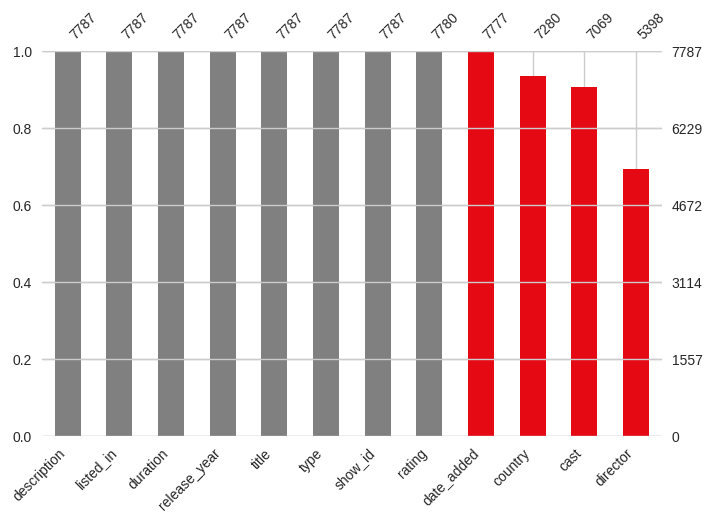

In [ ]:
#print missing values
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{}'s null rate :{}%\n".format(i,round(null_rate,2)))

#plotting missing values using missingno
fig, ax = plt.subplots(figsize=(8,5))
color = ['grey','grey','grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914']
msno.bar(df,fontsize =10, color = color, sort = 'descending',ax=ax)

Director's has the most missing values in our dataset which is followed by cast, country and date_added.

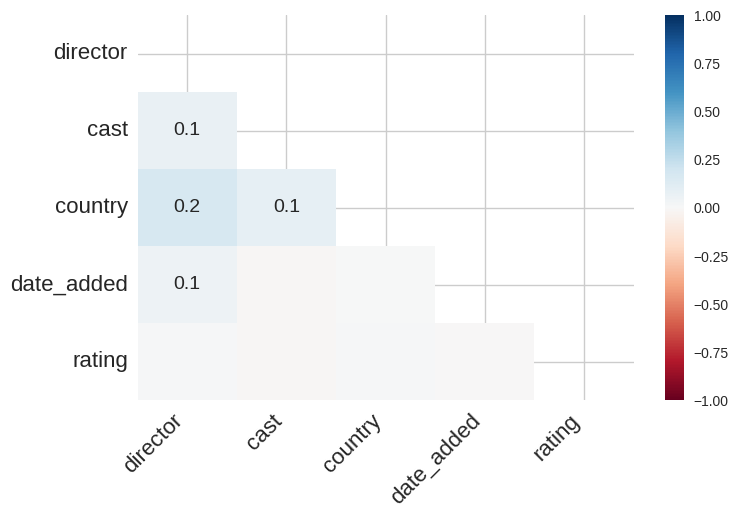

In [ ]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
fig, ax = plt.subplots(figsize=(8,5))
msno.heatmap(df,ax=ax);

*   **Heatmap shows the correlation of missingness between every 2 columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.**

###**4.1. Handling Missing Value**

In [ ]:
# Handling the missing values
df[['director','country']] = df[['director','country']].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Cast')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)


In [ ]:
#checking for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The null values in the director and country columns are filled with the string "unknown," the cast column is 'no cast', and the mode value is used to fill the null values in the rating column. Finally, the records with null values in the "date_added" column have been removed.

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

###**4.2. Checking for duplicate values**

In [ ]:
##check for duplicates
duplicates =len(df[df.duplicated()])
print(duplicates)

0


*   **There were no duplicates found in the dataset**

#**5. Exploratory Data Analysis:**


###**5.1. Netflix Content**

In [ ]:
#Value count for content column
counts = df.type.value_counts()
percs = df.type.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

Movie      TV Show
count       5377.000000  2400.000000
percentage     0.691398     0.308602

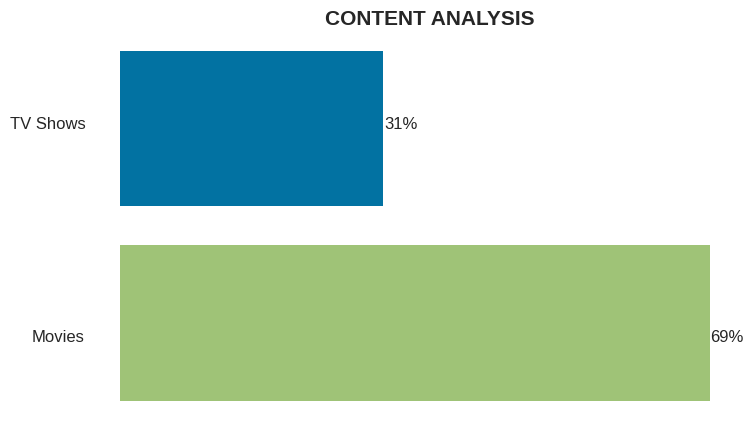

In [ ]:
#Analysis content analysis
x = df['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize = (8,5))
plt.title('CONTENT ANALYSIS', fontsize=15, fontweight='bold')
ax.barh([1], x.values[1])
plt.text(-1000,1, 'TV Shows')
plt.text(2410 ,1, '31%')

ax.barh([0], x.values[0])
plt.text(-800,-0.10, 'Movies')
plt.text(5377,-0.10, '69%')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)
fig.show()

Observations:

Netflix contains 69% movies and 31% television shows, indicating that movie shows have more content.

###**5.2. Netflix Ratings**

In [ ]:
#Value count for rating column
counts = df.rating.value_counts()
percs = df.rating.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

TV-MA        TV-14       TV-PG           R       PG-13  \
count       2868.00000  1928.000000  804.000000  665.000000  386.000000   
percentage     0.36878     0.247911    0.103382    0.085509    0.049634   

                  TV-Y       TV-Y7         PG        TV-G         NR  \
count       279.000000  270.000000  247.00000  194.000000  83.000000   
percentage    0.035875    0.034718    0.03176    0.024945   0.010672   

                    G  TV-Y7-FV        UR     NC-17  
count       39.000000  6.000000  5.000000  3.000000  
percentage   0.005015  0.000772  0.000643  0.000386

In [ ]:
#creating two extra column
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

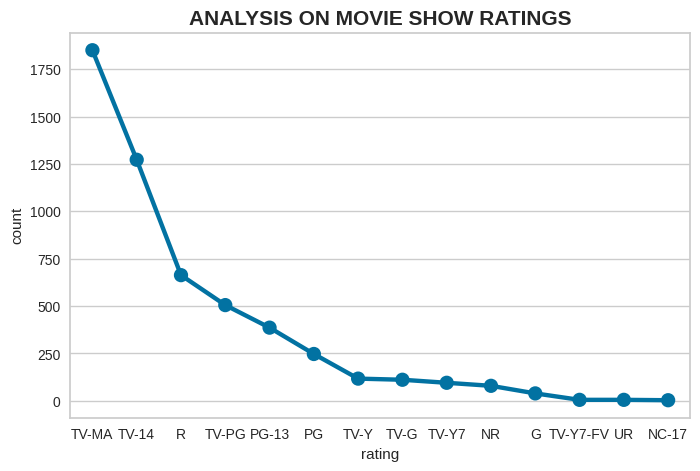

In [ ]:
#Analysis on rating based on overall movie show rating system
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

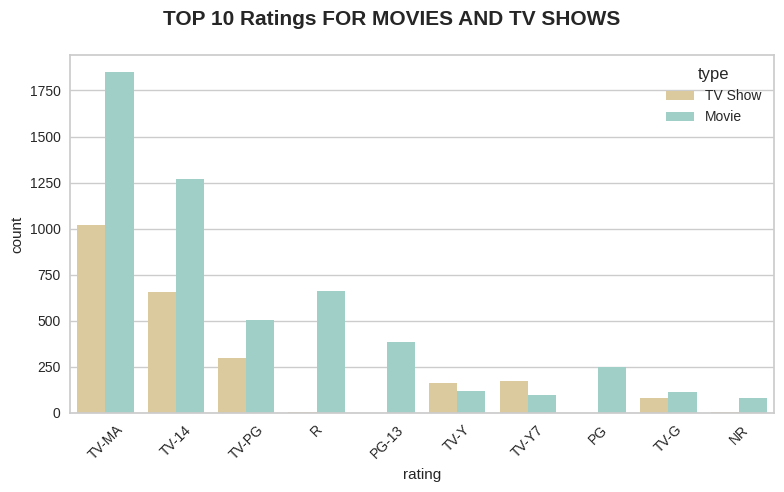

In [ ]:
#Ananlysis top 10 Ratings Show
plt.figure(figsize=(8,5))
plt.suptitle('TOP 10 Ratings FOR MOVIES AND TV SHOWS',fontsize=15, fontweight='bold')
graph = sns.countplot(x="rating", data=df, hue='type',palette="BrBG", order=df['rating'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observations:

## The most common rating for movies and television show is TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience." Since the number of movies is higher than the number of TV shows, as we saw earlier in the type column, movies receive the highest rating when compared to TV shows, which is pretty obvious.

###**5.3. Netflix Release year**

In [ ]:
#Value count for year column
counts = df.release_year.value_counts()
percs = df.release_year.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

2018         2017       2019        2016        2020  \
count       1120.000000  1012.000000  996.00000  881.000000  868.000000   
percentage     0.144014     0.130127    0.12807    0.113283    0.111611   

                  2015        2014        2013        2012        2010  ...  \
count       539.000000  334.000000  266.000000  218.000000  172.000000  ...   
percentage    0.069307    0.042947    0.034203    0.028031    0.022116  ...   

                1969      1963      1954      1970      1956      1925  \
count       2.000000  2.000000  2.000000  2.000000  2.000000  1.000000   
percentage  0.000257  0.000257  0.000257  0.000257  0.000257  0.000129   

                1964      1966      1947      1959  
count       1.000000  1.000000  1.000000  1.000000  
percentage  0.000129  0.000129  0.000129  0.000129  

[2 rows x 73 columns]

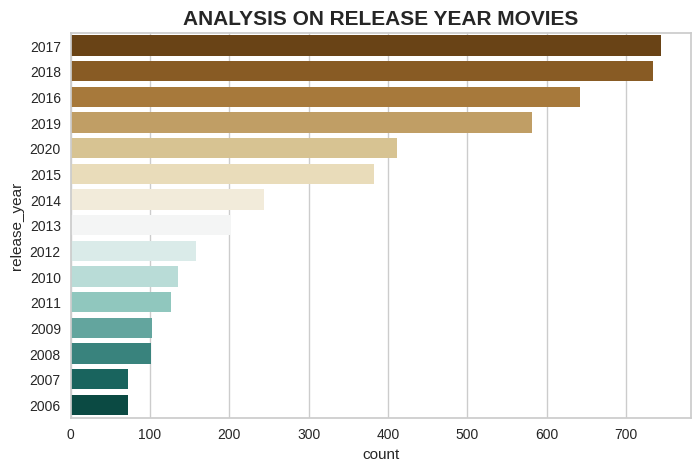

In [ ]:
#Analysis on release year of movie show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=movies, palette="BrBG", order=movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR MOVIES', fontsize=15, fontweight='bold')
plt.show()

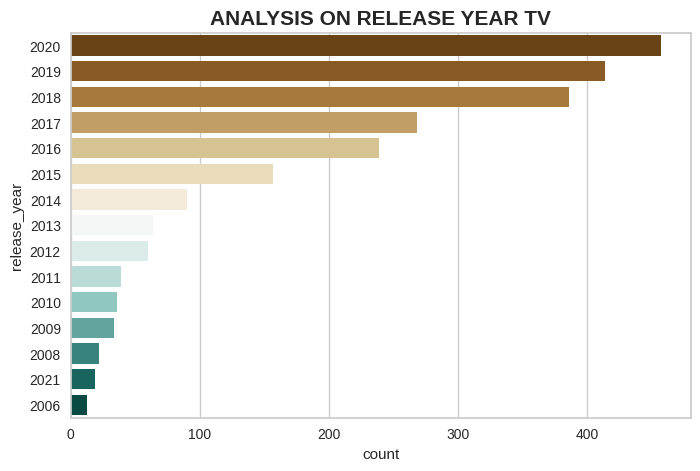

In [ ]:
#Analysis release year of tv show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=tv_shows, palette="BrBG", order=tv_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR TV', fontsize=15, fontweight='bold')
plt.show()

Observations:

Netflix continues to add more shows on its platform over the years. Highest number of movies released in 2017 and 2018. Highest number of tv shows released in 2019 and 2020.

There is a decrease in the number of movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows. We have Netflix data only up to 2021, hence there are less movies added in this year.

The number of movies on Netflix is growing significantly faster than the number of TV shows. It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

**5.4. Netflix Release Month**

In [ ]:
#Value count for month column
counts = df.month_added.value_counts()
percs = df.month_added.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

12          10          1           11          3   \
count       833.000000  785.000000  757.000000  738.000000  669.000000   
percentage    0.107111    0.100939    0.097338    0.094895    0.086023   

                    9           8           4           7           5   \
count       619.000000  618.000000  601.000000  600.000000  543.000000   
percentage    0.079594    0.079465    0.077279    0.077151    0.069821   

                    6           2   
count       542.000000  472.000000  
percentage    0.069693    0.060692

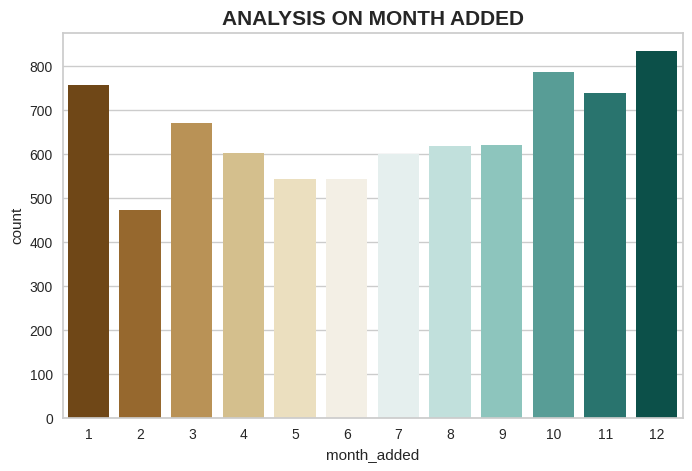

In [ ]:
#Analysis on content added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED', fontsize=15, fontweight='bold')
plt.show()

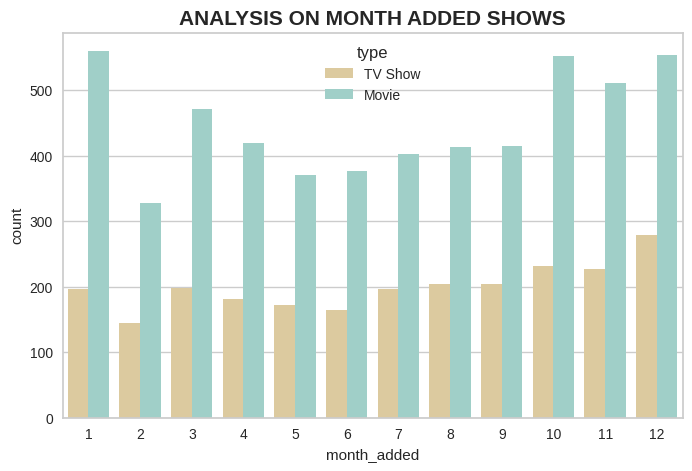

In [ ]:
#Analysis on contnet(movies/tv shows) added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', hue='type',palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED SHOWS', fontsize=15, fontweight='bold')
plt.show()

Observations:

The Christmas season (October, November, December, and January) sees a greater amount of content released. Compared to TV shows, more movies are released each month.

In [ ]:
#Value count for genres column
counts = df.listed_in.value_counts()
percs = df.listed_in.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

Documentaries  Stand-Up Comedy  Dramas, International Movies  \
count          334.000000       321.000000                    320.000000   
percentage       0.042947         0.041276                      0.041147   

            Comedies, Dramas, International Movies  \
count                                   243.000000   
percentage                                0.031246   

            Dramas, Independent Movies, International Movies    Kids' TV  \
count                                             215.000000  204.000000   
percentage                                          0.027646    0.026231   

            Children & Family Movies  Documentaries, International Movies  \
count                     177.000000                           172.000000   
percentage                  0.022759                             0.022116   

            Children & Family Movies, Comedies  \
count                               169.000000   
percentage                            0.021731   

            Comedies, International Movies  ...  \
count                           161.000000  ...   
percentage                        0.020702  ...   

            TV Horror, TV Mysteries, Teen TV Shows  \
count                                     1.000000   
percentage                                0.000129   

            Action & Adventure, International Movies, Thrillers  \
count                                                1.000000     
percentage                                           0.000129     

            Anime Series, TV Horror, TV Thrillers  \
count                                    1.000000   
percentage                               0.000129   

            Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy  \
count                                                1.000000            
percentage                                           0.000129            

            TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows  \
count                                            1.000000   
percentage                                       0.000129   

            Anime Series, Crime TV Shows, TV Thrillers  \
count                                         1.000000   
percentage                                    0.000129   

            Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows  \
count                                                1.000000              
percentage                                           0.000129              

            Crime TV Shows, International TV Shows, Reality TV  \
count                                                1.000000    
percentage                                           0.000129    

            International Movies, Romantic Movies, Sci-Fi & Fantasy  \
count                                                1.000000         
percentage                                           0.000129         

            International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows  
count                                                1.000000                                
percentage                                           0.000129                                

[2 rows x 491 columns]

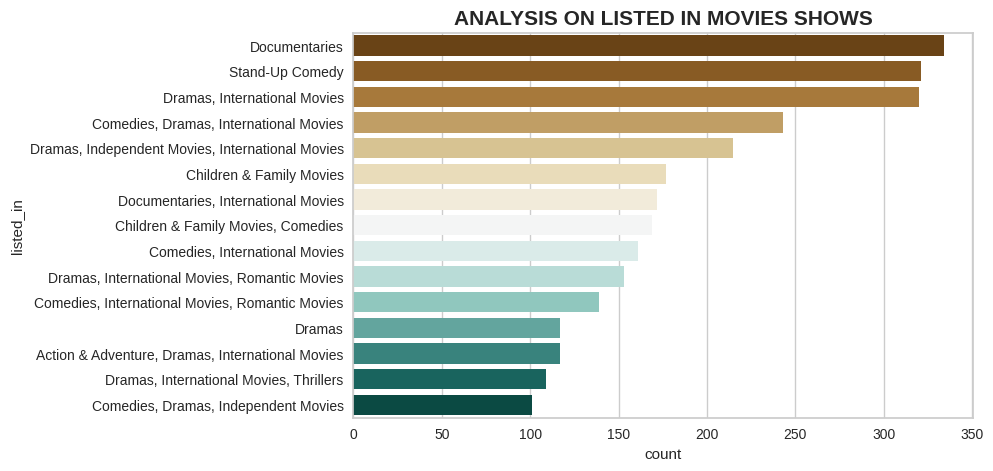

In [ ]:
#Analysis listed in movie shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=movies, palette="BrBG", order=movies['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED IN MOVIES SHOWS', fontsize=15, fontweight='bold')
plt.show()

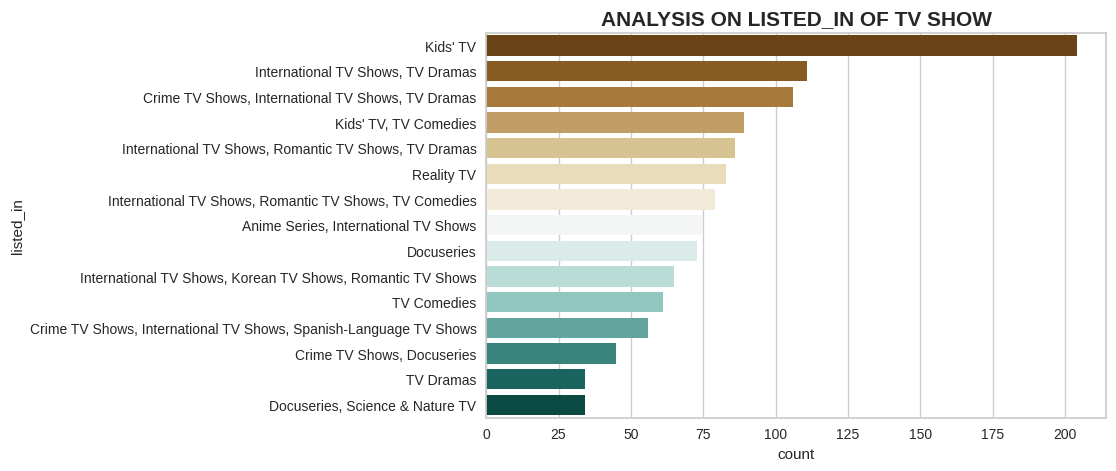

In [ ]:
#Analysis on listed in tv shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=tv_shows, palette="BrBG", order=tv_shows['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED_IN OF TV SHOW', fontsize=15,fontweight='bold')
plt.show()

Observations:

The most popular Netflix category is documentaries, which are followed by stand-up comedy, Drams, and foreign films.
The most popular Netflix TV show category is kids TV.

###**5.6. Netflix Duration**

In [ ]:
#Value count for duration column
counts = df.duration.value_counts()
percs = df.duration.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

1 Season   2 Seasons   3 Seasons      90 min      93 min  \
count       1608.000000  378.000000  183.000000  136.000000  131.000000   
percentage     0.206764    0.048605    0.023531    0.017487    0.016845   

                94 min      91 min      95 min      92 min      97 min  ...  \
count       125.000000  125.000000  119.000000  118.000000  117.000000  ...   
percentage    0.016073    0.016073    0.015302    0.015173    0.015044  ...   

             193 min    13 min   214 min     8 min  13 Seasons     9 min  \
count       1.000000  1.000000  1.000000  1.000000    1.000000  1.000000   
percentage  0.000129  0.000129  0.000129  0.000129    0.000129  0.000129   

             182 min   224 min   233 min   191 min  
count       1.000000  1.000000  1.000000  1.000000  
percentage  0.000129  0.000129  0.000129  0.000129  

[2 rows x 216 columns]

In [ ]:
#Analysis on distribution of movie show duration
fig =px.histogram(x=movies['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(title="DISTRIBUTION OF MOVIES SHOWS DURATION",xaxis_title="Duration of movie Shows")

<Axes: title={'center': 'DISTRIBUTION OF TV SHOW DURATION'}, xlabel='duration', ylabel='count'>

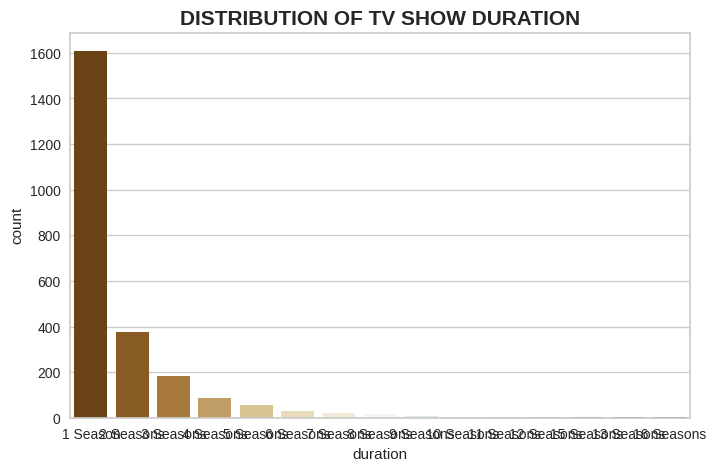

In [ ]:
#Analysis on distribution of movie show duration
plt.figure(figsize=(8,5))
plt.title("DISTRIBUTION OF TV SHOW DURATION",fontsize=15,fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,palette="BrBG",order = tv_shows['duration'].value_counts().index)

Text(0.5, 1.0, 'DISTRIBUTION OF MINUTES IN DURATION')

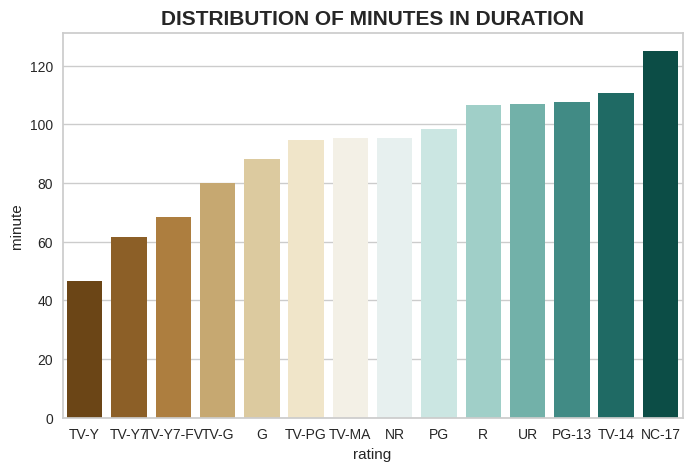

In [ ]:
#Analysis on distribution of minutes duration
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(8,5))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute,palette="BrBG")
plt.title("DISTRIBUTION OF MINUTES IN DURATION",fontsize=15,fontweight='bold')

**Observations:**
*   **The majority of movies have  a duration between 90 and 120 minutes.**
*   **The Majority of tv shows consisting of single season.**
*   **The lengthiest average runtimes are found in NC-17 rated movies. The average duration of movies with a TV-Y rating is the shortest.**

###**5.7. Netflix country wise**

In [ ]:
#Value count for country column
counts = df.country.value_counts()
percs = df.country.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

United States       India     Unknown  United Kingdom       Japan  \
count         2549.000000  923.000000  506.000000      396.000000  225.000000   
percentage       0.327761    0.118683    0.065064        0.050919    0.028931   

            South Korea      Canada      Spain      France       Egypt  ...  \
count        183.000000  177.000000  134.00000  115.000000  101.000000  ...   
percentage     0.023531    0.022759    0.01723    0.014787    0.012987  ...   

            United States, South Korea, Japan  \
count                                1.000000   
percentage                           0.000129   

            Lebanon, United Arab Emirates, France, Switzerland, Germany  \
count                                                1.000000             
percentage                                           0.000129             

            France, Australia, Germany  Ireland, United States  \
count                         1.000000                1.000000   
percentage                    0.000129                0.000129   

            United States, Canada, Germany  Russia, United States, China  \
count                             1.000000                      1.000000   
percentage                        0.000129                      0.000129   

            Italy, Switzerland, France, Germany  \
count                                  1.000000   
percentage                             0.000129   

            United States, United Kingdom, Canada  \
count                                    1.000000   
percentage                               0.000129   

            United States, United Kingdom, Japan  \
count                                   1.000000   
percentage                              0.000129   

            Sweden, Czech Republic, United Kingdom, Denmark, Netherlands  
count                                                1.000000             
percentage                                           0.000129             

[2 rows x 682 columns]

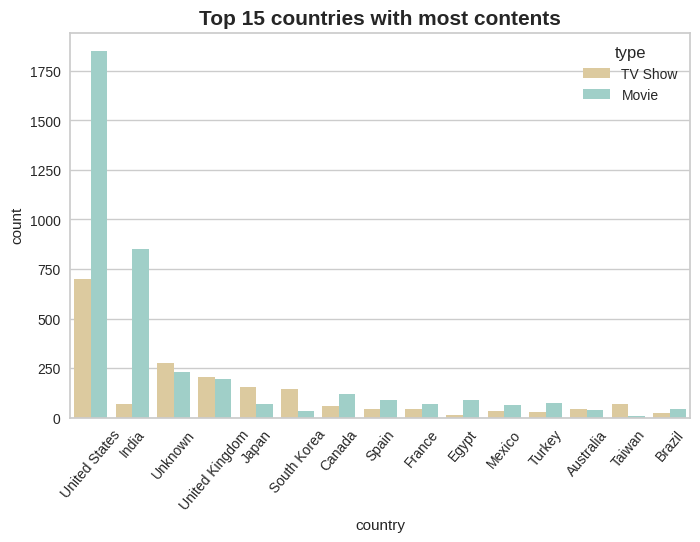

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(8,5))
sns.countplot(x=df['country'],palette="BrBG",order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

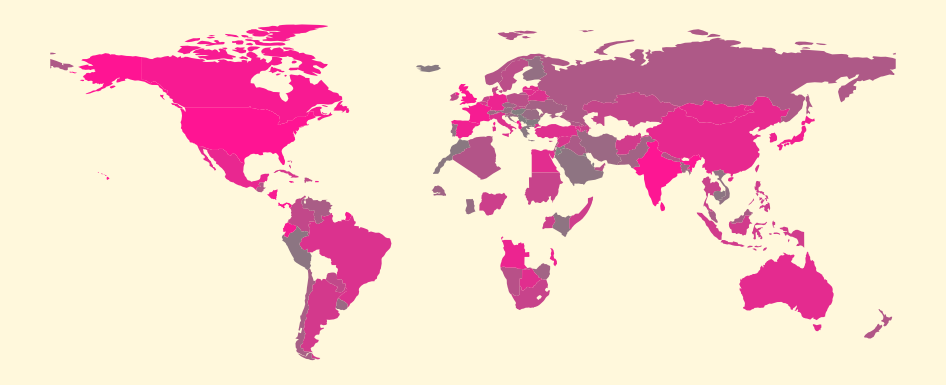

In [ ]:
country = df.country.value_counts()

coun = {}

#for loop coutry wise
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

#craete a dataframe
temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False))


temp['color'] = temp['count'].apply(lambda x : '#b20710' if x > temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
temp['iso_code'] = coco.convert(names=temp['country'], to ='ISO3')
temp = temp[temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(temp,left_on = 'iso_a3', right_on = 'iso_code')

temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#FF1493','grey','#FF1493',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#FFF8DC')
ax.set_facecolor('#FFF8DC')
temp_map.dropna().plot(column = 'count',
                       color = temp_map.dropna()['color'],
                       cmap = cmap,
                       scheme='quantiles',
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
fig.show()

In [ ]:
#Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  South Korea  \
target_ages                                                                  
Adults       0.446328  0.277228  0.678261  0.255688  0.368889     0.469945   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889     0.027322   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111     0.120219   
Teens        0.146893  0.683168  0.165217  0.567714  0.351111     0.382514   

country         Spain  United Kingdom  United States   Unknown  
target_ages                                                     
Adults       0.835821        0.512626       0.502942  0.320158  
Kids         0.022388        0.093434       0.073362  0.169960  
Older Kids   0.044776        0.204545       0.187132  0.235178  
Teens        0.097015        0.189394       0.236563  0.274704

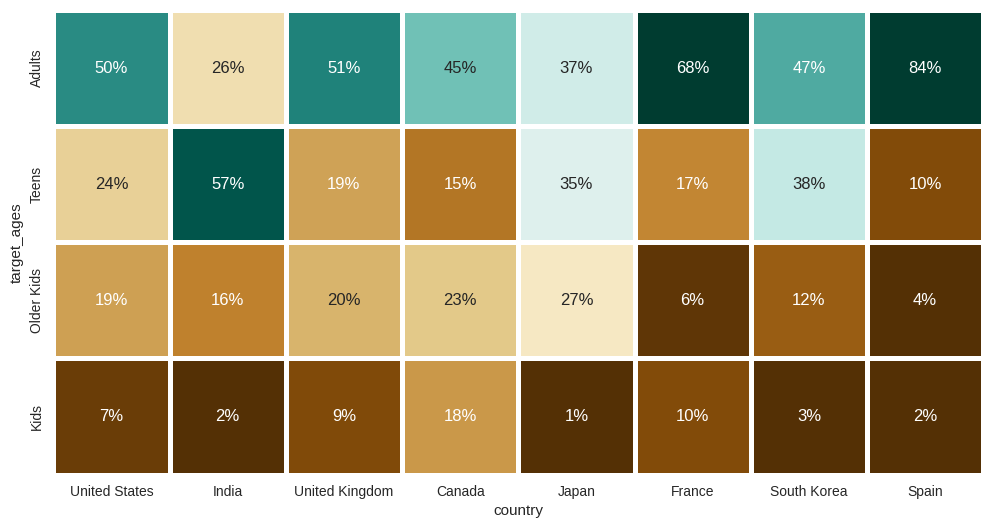

In [ ]:
#Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="BrBG",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()


Observations:

These visualisations show the content's country of origin, which include both Movies and TVs shows. Top of the list of nations were the US and India. A few countries, including Australia, Taiwan, and Brazil, produce little Netflix content.

From the heatmap,the US and UK are very similar to the Netflix target age group, although they differ greatly from such as India or Japan.

###**5.8. Most occurred word in Title**

In [ ]:
#Value count for title column
counts = df.title.value_counts()
percs = df.title.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
3%                                           1    0.000129
Retablo                                      1    0.000129
Ricky Gervais: Humanity                      1    0.000129
Richie Rich                                  1    0.000129
Richard Pryor: Live in Concert               1    0.000129
...                                        ...         ...
Handsome Siblings                            1    0.000129
Handsome Devil                               1    0.000129
Hamza's Suitcase                             1    0.000129
Hamid                                        1    0.000129
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS      1    0.000129

[7777 rows x 2 columns]

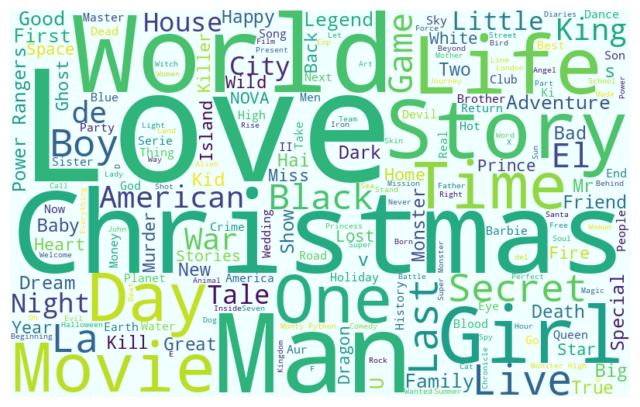

In [ ]:
#text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(width = 800, height = 500,stopwords=STOPWORDS, background_color='azure', min_font_size=8).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

###**5.9. Most occurred word in Description**

In [ ]:
#Value count for description column
counts = df.description.value_counts()
percs = df.description.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

count  percentage
Multiple women report their husbands as missing...      3    0.000386
A surly septuagenarian gets another chance at h...      3    0.000386
A scheming matriarch plots to cut off her disab...      2    0.000257
As a blind librarian, dispirited cricketer and ...      2    0.000257
A young Han Solo tries to settle an old score w...      2    0.000257
...                                                   ...         ...
From Joe Berlinger, director of the "Paradise L...      1    0.000129
A homicide detective, a criminal profiler and a...      1    0.000129
Researchers add context and clarity to UFO myst...      1    0.000129
Homicide detective Gene Handsome sets out to so...      1    0.000129
This documentary delves into the mystique behin...      1    0.000129

[7759 rows x 2 columns]

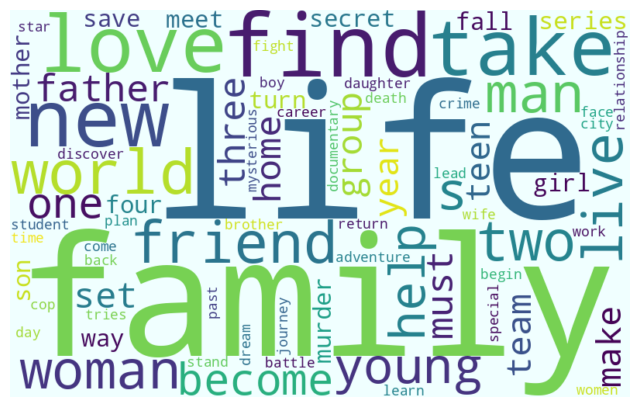

In [ ]:
#text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(width = 800, height = 500,stopwords=STOPWORDS, background_color='azure', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

#**6. Handling Outliers**

<Axes: >

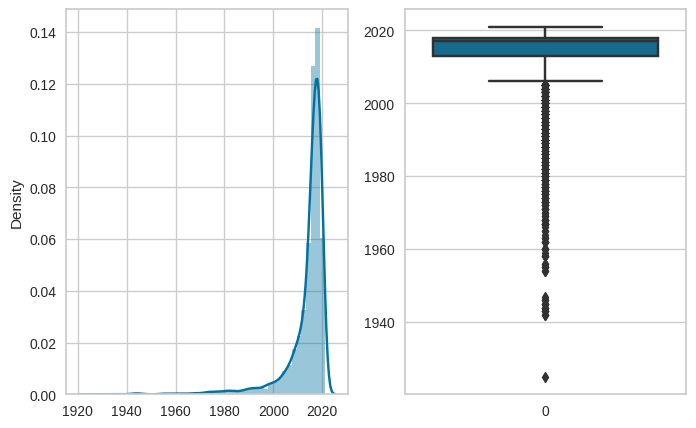

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(8,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(df.release_year)

*   **The figures (release_year less than 2009) are being displayed as outliers**

###**6.1. Replacing outliers with mean value**

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


we don't have have any release_year which is greater than 2018

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) | ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]


In [ ]:
release_year_outliers

show_id     type                 title         director  \
7         s8    Movie                   187   Kevin Reynolds   
44       s45    Movie              Æon Flux     Karyn Kusama   
94       s95    Movie               28 Days     Betty Thomas   
97       s98    Movie           3 Deewarein  Nagesh Kukunoor   
105     s106    Movie   300 Miles to Heaven   Maciej Dejczer   
...      ...      ...                   ...              ...   
7745   s7746    Movie  Yours, Mine and Ours     Raja Gosnell   
7749   s7750  TV Show             Yu-Gi-Oh!          Unknown   
7754   s7755    Movie                  Yuva      Mani Ratnam   
7760   s7761    Movie             Zaki Chan       Wael Ihsan   
7782   s7783    Movie                  Zozo      Josef Fares   

                                                   cast  \
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   
44    Charlize Theron, Marton Csokas, Jonny Lee Mill...   
94    Sandra Bullock, Viggo Mortensen, Dominic West,...   
97    Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...   
105   Krzysztof Stroiński, Andrzej Mellin, Adrianna ...   
...                                                 ...   
7745  Dennis Quaid, Rene Russo, Sean Faris, Katija P...   
7749  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   
7754  Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...   
7760  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   

                                                country  release_year rating  \
7                                         United States          1997      R   
44                                        United States          2005  PG-13   
94                                        United States          2000  PG-13   
97                                              Unknown          2003  TV-MA   
105                             Denmark, France, Poland          1989  TV-14   
...                                                 ...           ...    ...   
7745                                      United States          2005     PG   
7749                                              Japan          2005  TV-Y7   
7754                                              India          2004  TV-14   
7760                                              Egypt          2005  TV-PG   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   

       duration                                        listed_in  \
7       119 min                                           Dramas   
44       93 min             Action & Adventure, Sci-Fi & Fantasy   
94      104 min                                 Comedies, Dramas   
97      121 min          Dramas, International Movies, Thrillers   
105      93 min                     Dramas, International Movies   
...         ...                                              ...   
7745     88 min               Children & Family Movies, Comedies   
7749  2 Seasons                           Anime Series, Kids' TV   
7754    160 min                     Dramas, International Movies   
7760    109 min  Comedies, International Movies, Romantic Movies   
7782     99 min                     Dramas, International Movies   

                                            description  month_added  \
7     After one of his high school students attacks ...           11   
44    Aiming to hasten an uprising, the leader of an...            2   
94    After her drunken antics result in property da...            9   
97    A reporter interviews three convicts on death ...           12   
105   Hoping to help their dissident parents, two br...           10   
...                                                 ...          ...   
7745  When a father of eight and a mother of 10 prep...           11   
7749  The lives of young Yugi Moto and his friends J...            7   
7754  An accident on a bridge ties together three yo...            3   
7760  An unqualified young ma

In [ ]:
#15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

###**6.2. Boxplot for release_year**

<Axes: >

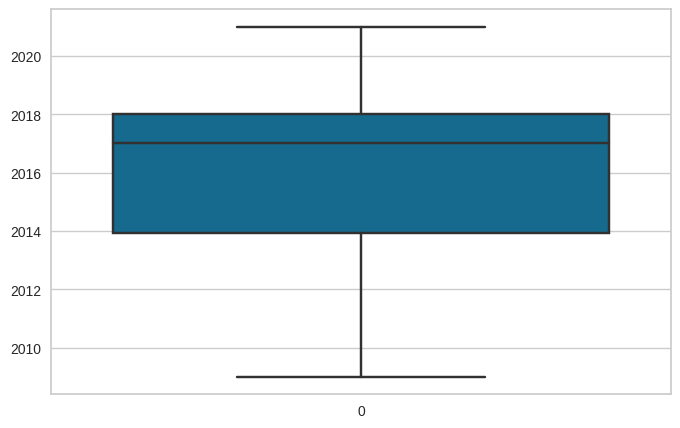

In [ ]:
#plot boxplot
plt.figure(figsize=(8,5))
sns.boxplot(df.release_year)

#**7. Data Preprocessing**

###**Modelling Approach:**

*   **Select the attributes based on which you want to cluster the shows**
*   **Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase**
*   **Lemmatization to generate a meaningful word out of corpus of words**
*   **Tokenization of corpus**
*   **Word vectorization**
*   **Dimensionality reduction**
*   **Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques**
*   **Build an optimal number of clusters and visualise the contents of each cluster using word clouds**








In [ ]:
df.fillna('',inplace=True)

*   **The director, cast, country, genre, and description are chosen as the attributes to cluster**

In [ ]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] +' ' + df['description'])
df['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

###**7.1. Removing non-ASCII characters:**

In [ ]:
import unicodedata
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df['clustering'] = remove_non_ascii(df['clustering'])
df['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

###**7.2. Remove stopwords and lower case:**

In [ ]:
# extracting and displaying the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [ ]:
# Removing stop words
df['clustering'] = df['clustering'].apply(stopwords)
df['clustering'][50]

"roland emmerich steven strait, camilla belle, cliff curtis, joel virgel, affif ben badra, mo zinal, nathanael baring, mona hammond, omar sharif united states, south africa action & adventure fierce mammoth hunter d'leh sets impossible journey rescue woman loves vicious warlord save people village."

###**7.3. Remove punctuations**


In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df['clustering'] = df['clustering'].apply(remove_punctuation)
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

###**7.4. Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df['clustering'] = lemmatize_verbs(df['clustering'])
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

###**7.5. Tokenization:**

In [ ]:
tokenizer = TweetTokenizer()
df['clustering'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x))
df['clustering'][50]

['roland',
 'emmerich',
 'steven',
 'strait',
 'camilla',
 'belle',
 'cliff',
 'curtis',
 'joel',
 'virgel',
 'affif',
 'ben',
 'badra',
 'mo',
 'zinal',
 'nathanael',
 'baring',
 'mona',
 'hammond',
 'omar',
 'sharif',
 'united',
 'states',
 'south',
 'africa',
 'action',
 'adventure',
 'fierce',
 'mammoth',
 'hunter',
 'dleh',
 'sets',
 'impossible',
 'journey',
 'rescue',
 'woman',
 'loves',
 'vicious',
 'warlord',
 'save',
 'people',
 'village']

###**7.6. Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_data = df['clustering']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 238313 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(7777, 20000)

In [ ]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:

# convert X into array form for clustering
X = X.toarray()

###**7.7. Dimensionality reduction using PCA:**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=50)
pca.fit(X)

PCA(random_state=50)

Text(0, 0.5, 'cumulative explained variance')

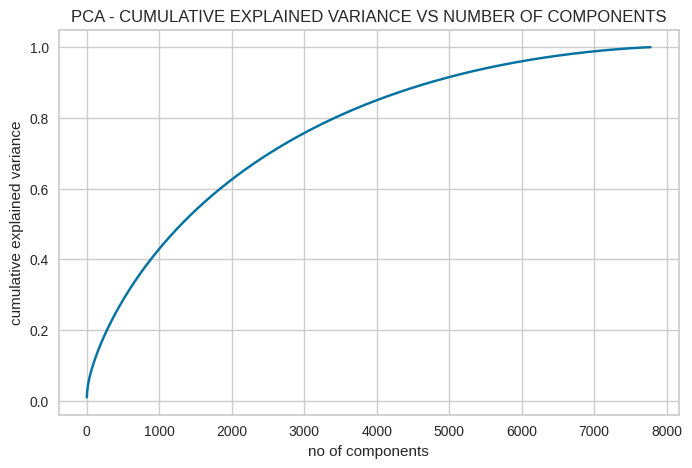

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - CUMULATIVE EXPLAINED VARIANCE VS NUMBER OF COMPONENTS')
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')

**Observations:**
*   **We find that around 7500 components account for 100% of the variance**
*   **Also, just 4000 components comprise more than 80% of the variation**
*   **As a result, we can pull the top 4000 components out of the model to make it simpler and less dimensional while still being able to account for more than 80% of variance.**

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=50)
pca.fit(X)

PCA(n_components=4000, random_state=50)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

#**8. Model Implementation:**

###**8.1. K-Means Clustering:**

**A well-liked unsupervised machine learning method for combining comparable data points is called K-means clustering. K-means clustering aims to divide a dataset into k clusters, each of which is represented by its centroid and contains similar data points.**

**Finding the ideal number of clusters for the K-means clustering algorithm requires visualising the elbow curve and Silhouette score.**

Text(0, 0.5, 'WCSS')

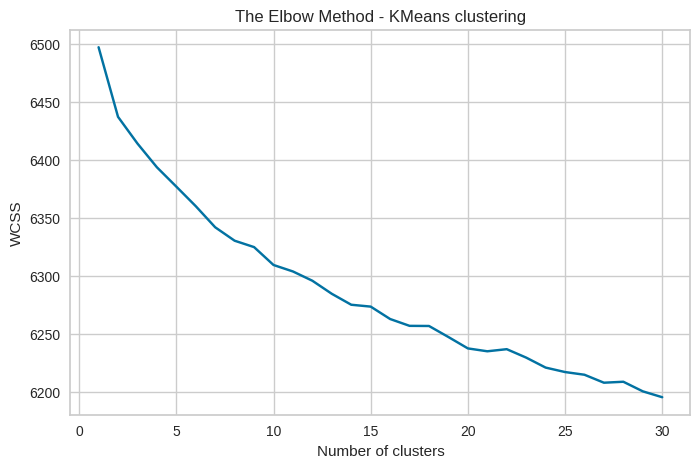

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(8,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Observations:**
*   **With more clusters, there is a decrease in the sum of squared distances between each point and the centroid.**

In [ ]:
#Displaying Silhouette plot for k means clustering
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(x_pca)
      centers = km.cluster_centers_

      score = silhouette_score(x_pca, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(x_pca)
      visualizer.poof()

For n_clusters = 2, silhouette score is 0.005492975199964538


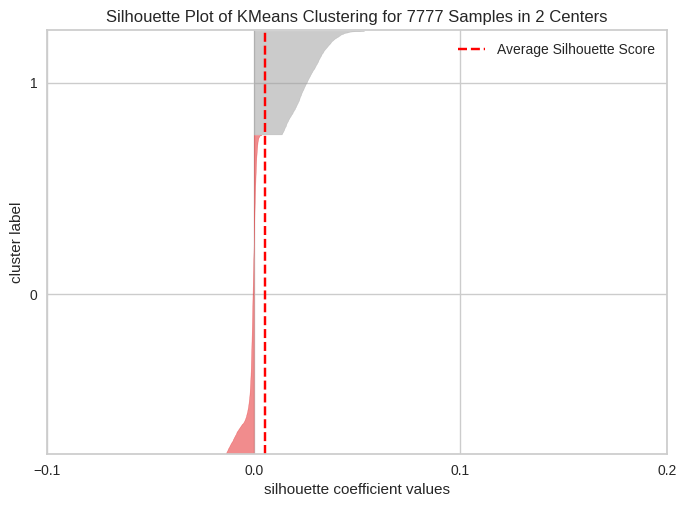

For n_clusters = 3, silhouette score is 0.006504980726838648


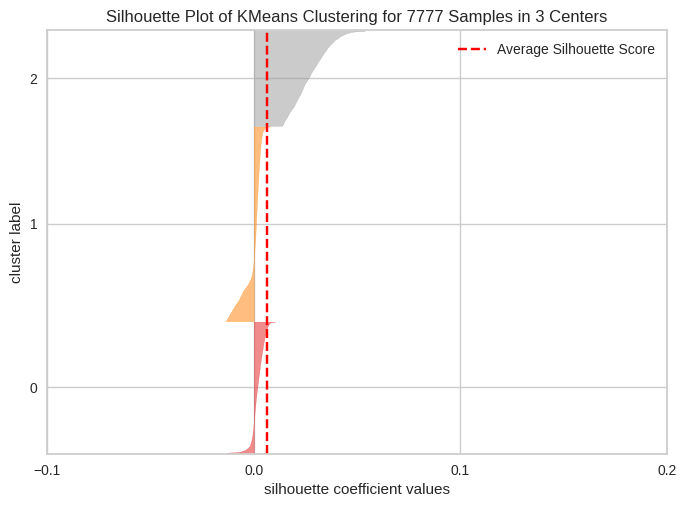

For n_clusters = 4, silhouette score is 0.00801767782918465


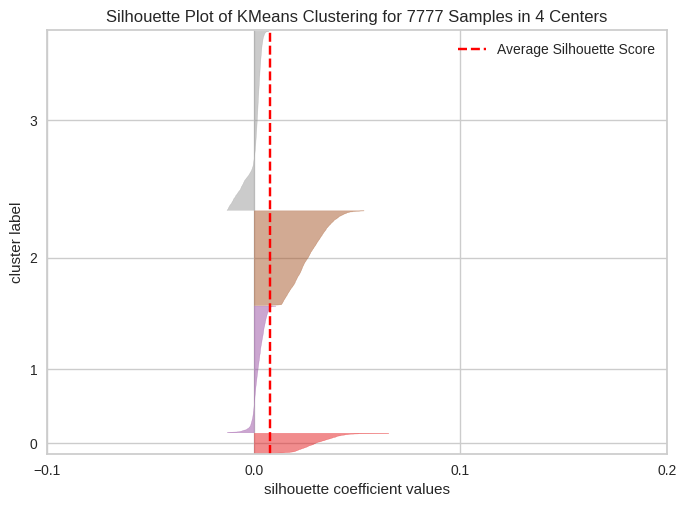

For n_clusters = 5, silhouette score is 0.008732687218828267


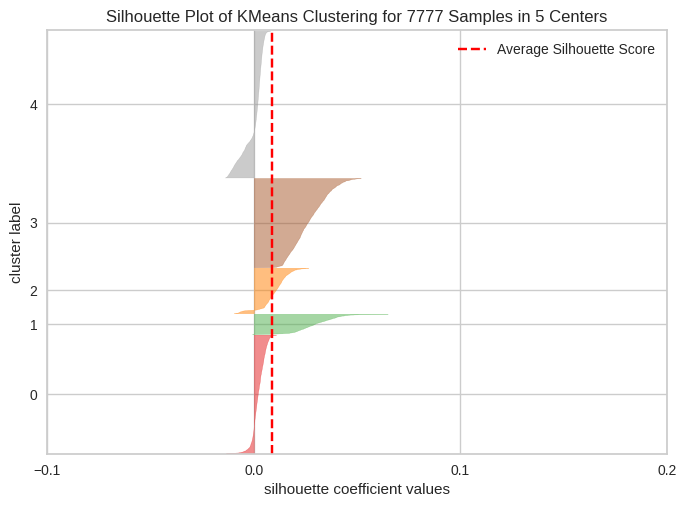

For n_clusters = 6, silhouette score is 0.008640135091479482


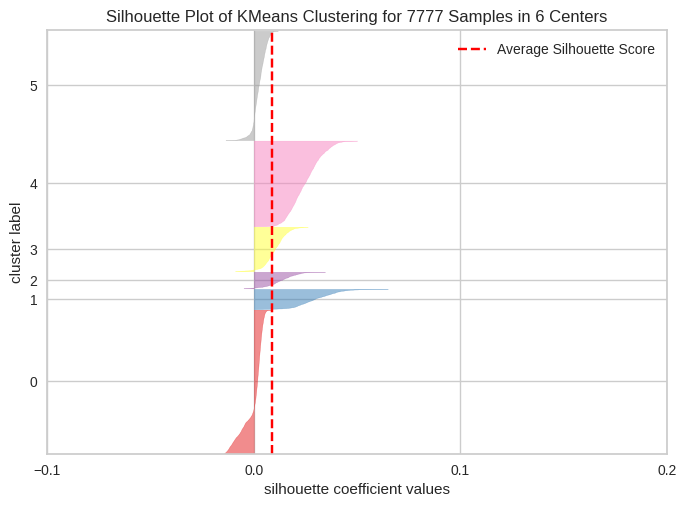

For n_clusters = 7, silhouette score is 0.005872181394350025


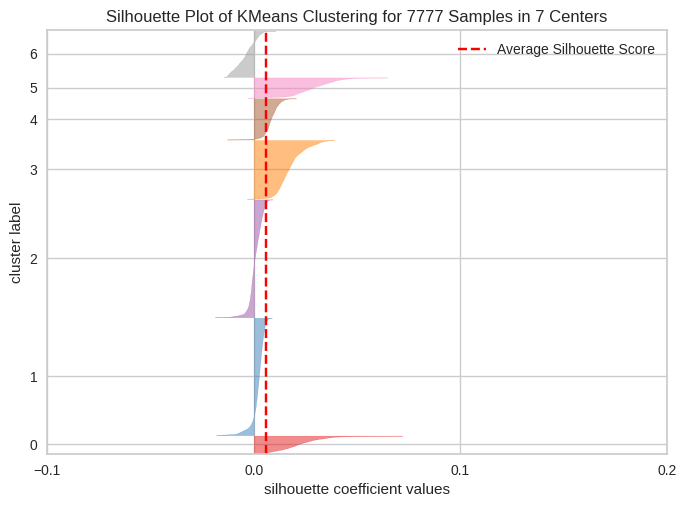

For n_clusters = 8, silhouette score is 0.0020041779819072758


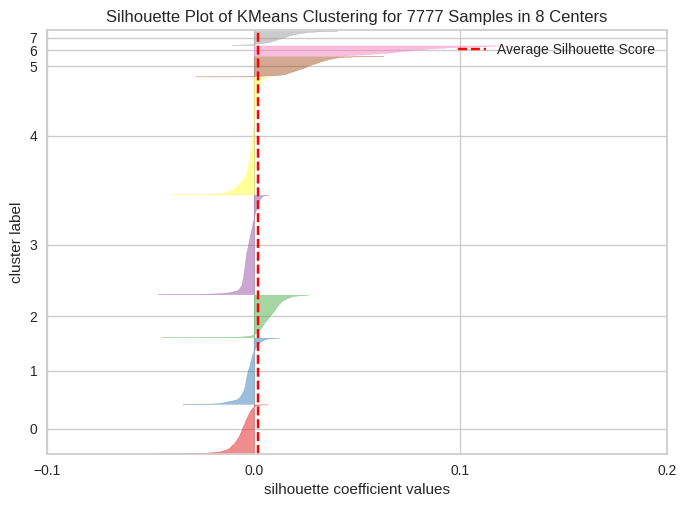

For n_clusters = 9, silhouette score is 0.007151802588023696


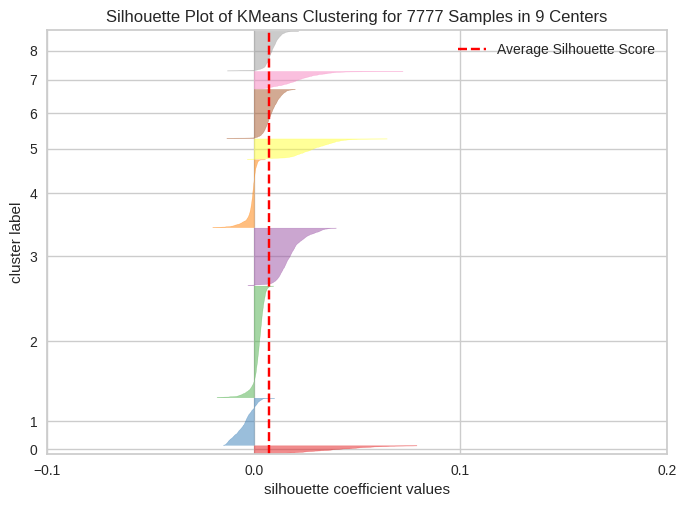

For n_clusters = 10, silhouette score is 0.006987652755677888


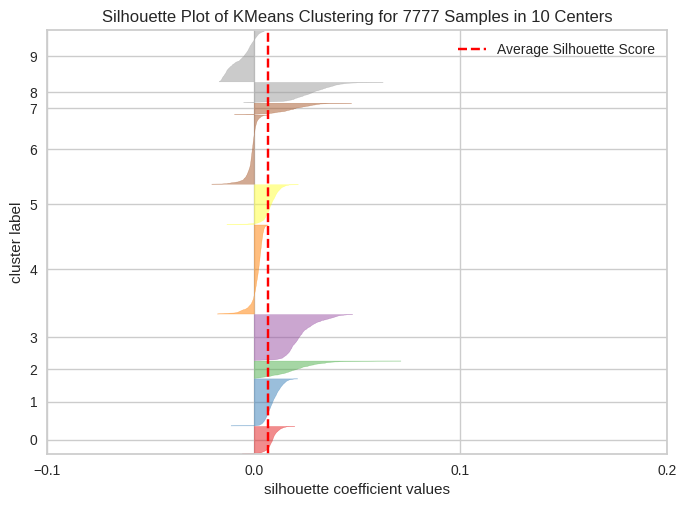

For n_clusters = 11, silhouette score is 0.0035322163171813675


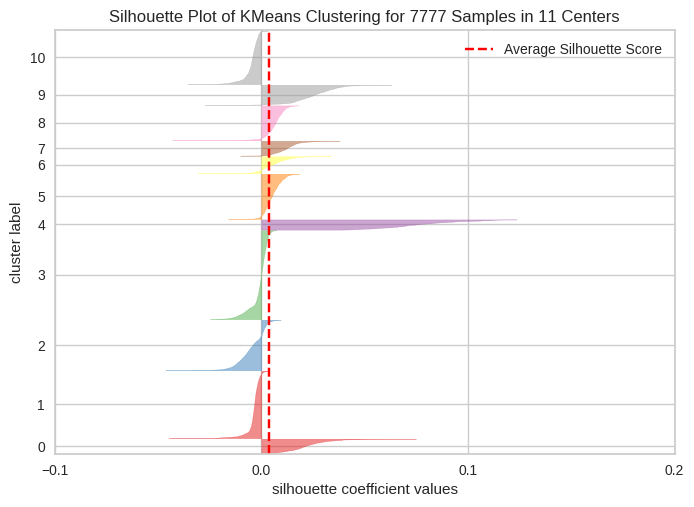

For n_clusters = 12, silhouette score is 0.004510851488021385


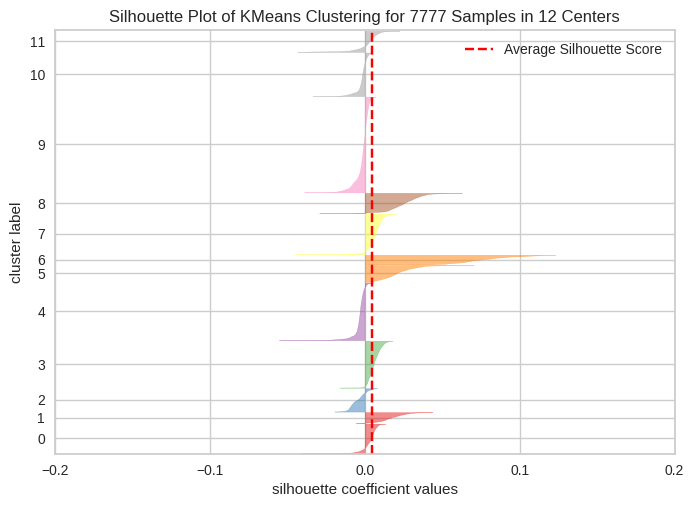

For n_clusters = 13, silhouette score is 0.004488952004496795


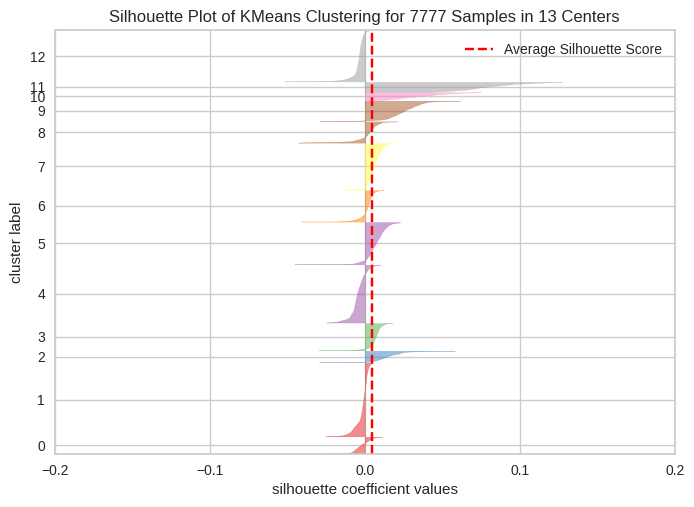

For n_clusters = 14, silhouette score is 0.005456350146603072


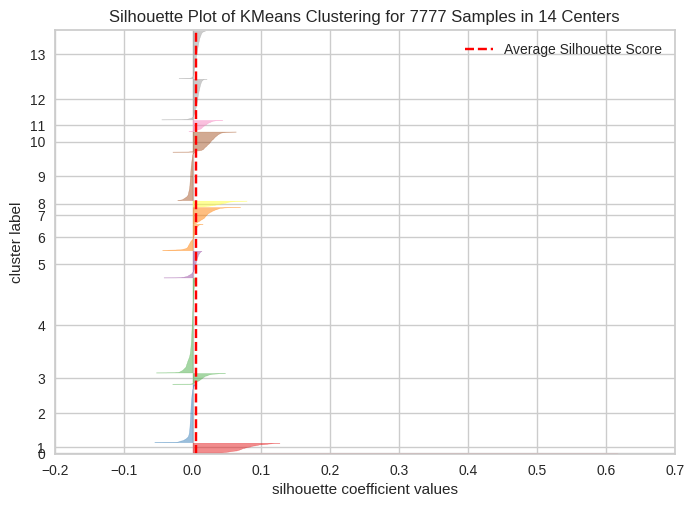

For n_clusters = 15, silhouette score is 0.005964910789406914


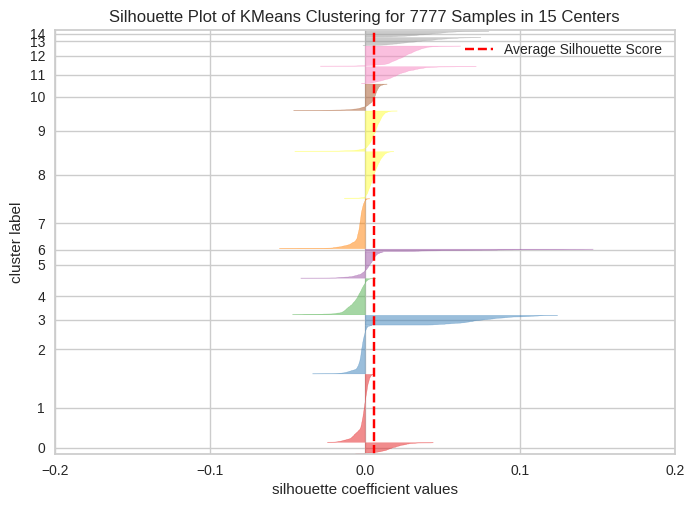

For n_clusters = 16, silhouette score is 0.005432909056174539


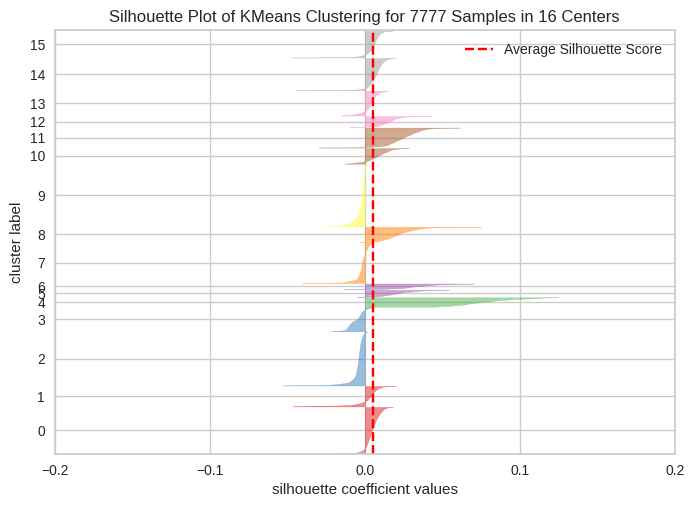

For n_clusters = 17, silhouette score is 0.006348925869253976


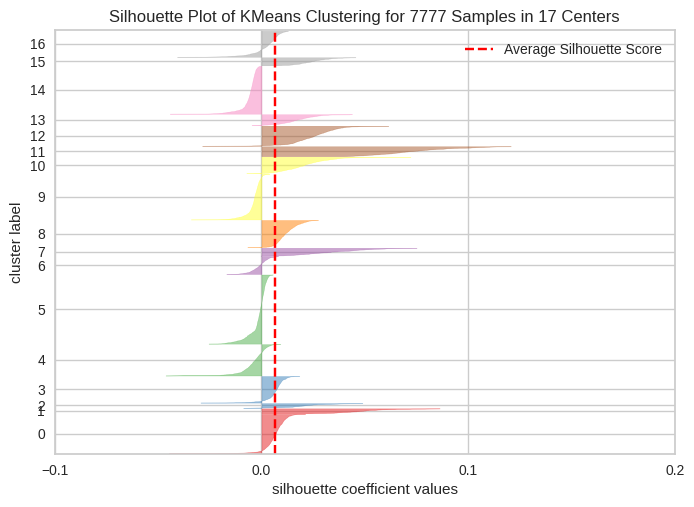

For n_clusters = 18, silhouette score is 0.007106371376884261


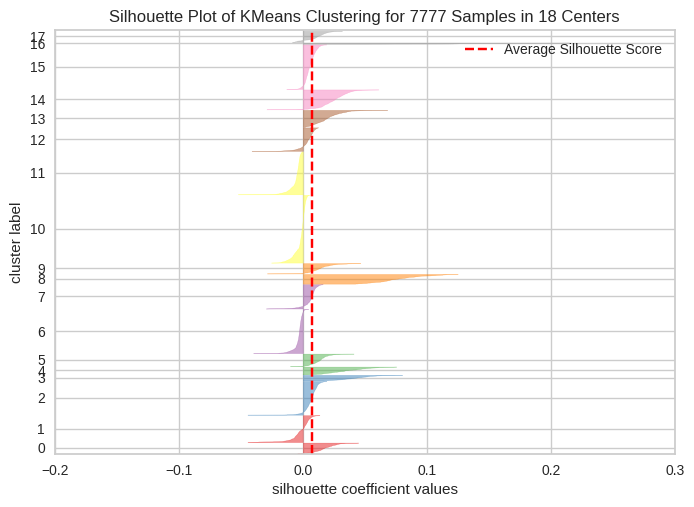

For n_clusters = 19, silhouette score is 0.004928400030560275


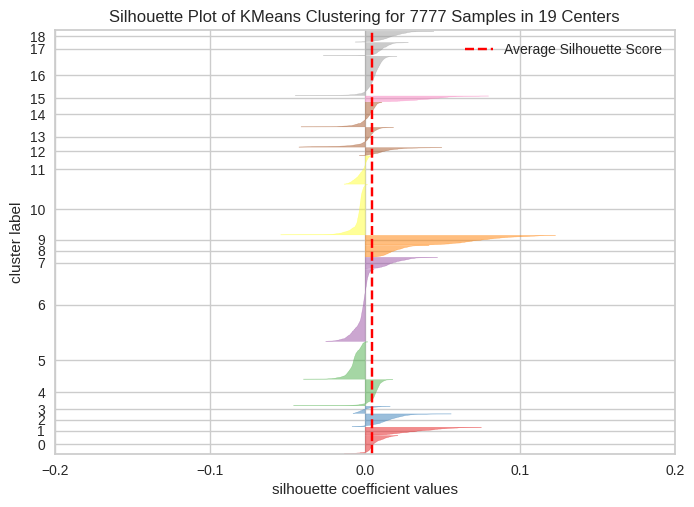

For n_clusters = 20, silhouette score is 0.00577210760828679


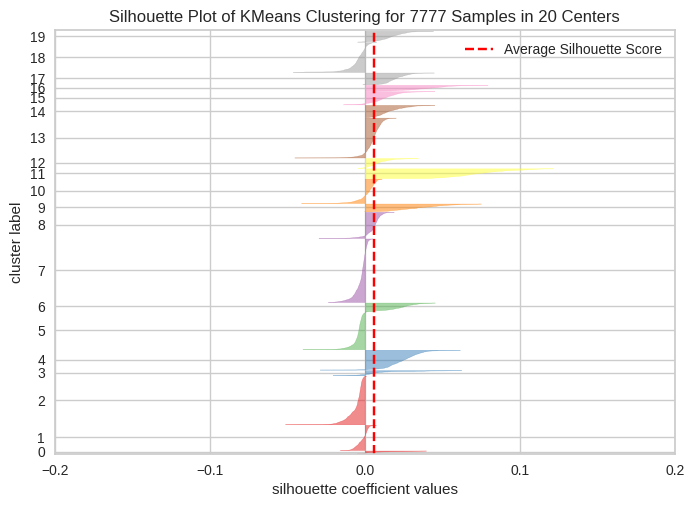

For n_clusters = 21, silhouette score is 0.005612837552764327


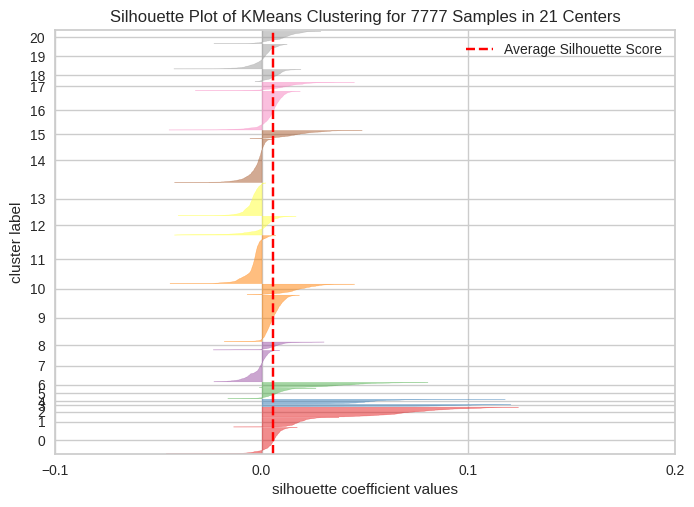

In [ ]:
silhouette_score_analysis(22)

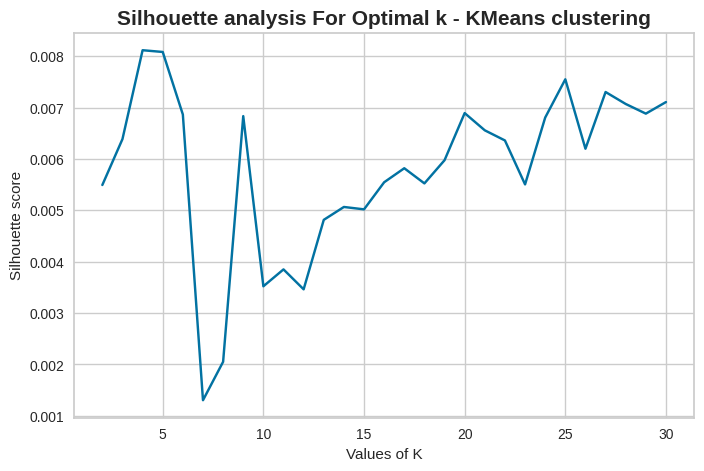

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
#plot
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering',fontsize=15, fontweight='bold')
plt.show()

**Observations:**
*   **Six clusters receive the highest Silhouette score overall.**
*   **Utilising the k-means clustering algorithm to create 6 clusters.**

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=50)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=50)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6361.2936014489405, 0.009161668425146383)


In [ ]:

# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

Text(0.5, 1.0, 'NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - KMEANS CLUSTERING')

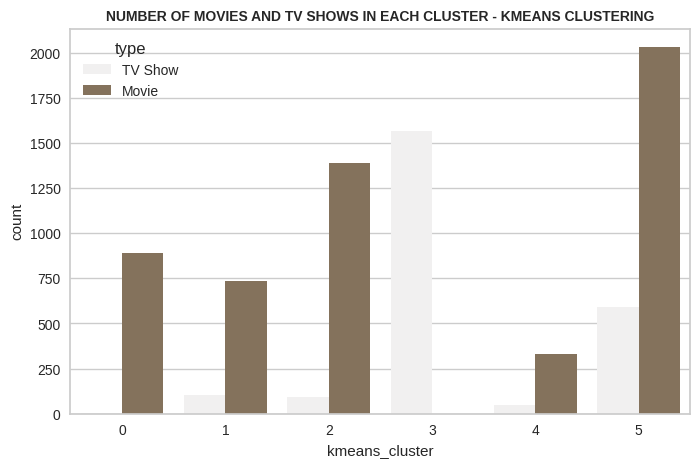

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type',color='#8B7355')
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - KMEANS CLUSTERING',fontsize=10, fontweight='bold')

**Observations:**
*   **K-means clustering technique was successfully used to construct 6 clusters**

###**8.2. Building wordclouds for different clusters built:**

**Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.**

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:
      val = str(val)
      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,background_color ='azure',stopwords = stopwords,min_font_size = 8).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8,5))
  plt.imshow(wordcloud)
  plt.axis("off")

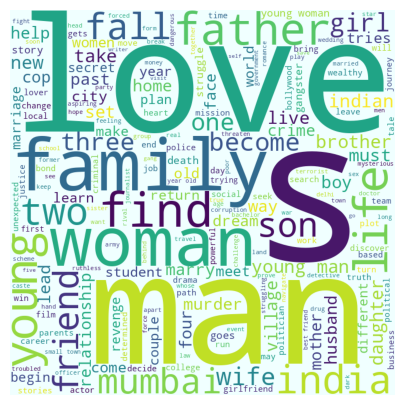

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)


*   **Life, documentary, family, world, film were noticed as keywords in cluster 0**

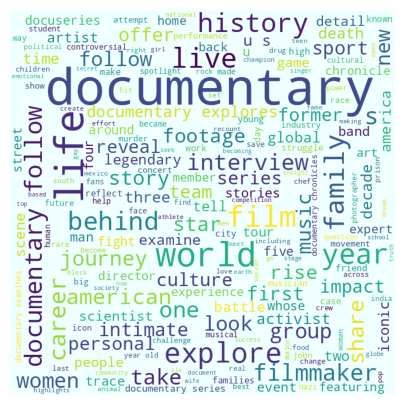

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

*   **Life, love, find, young, man were noticed as keywords in cluster  1**

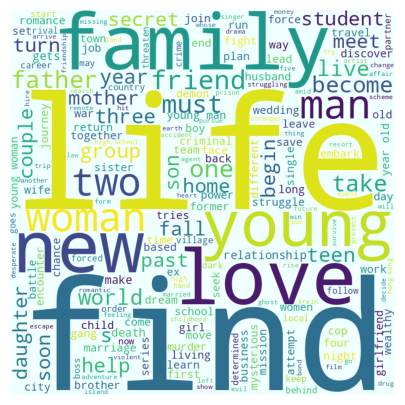

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

*   **Series, world, adventure, life, new were noticed as keywords in cluster 2**

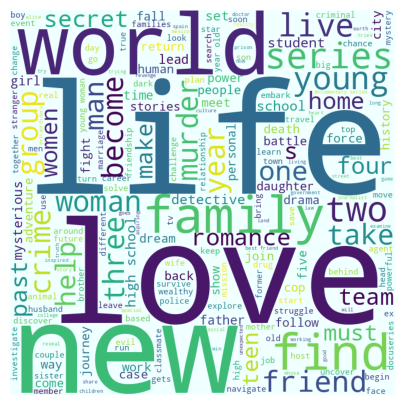

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

*   **Comedian, special, stand, comic, comedy were noticed as keywords in cluster 3**

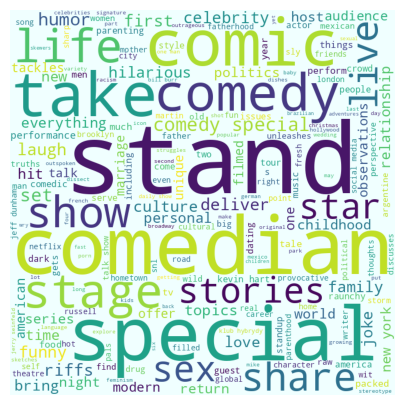

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

*   **Life, find, new, family, friend were noticed as keywords in cluster 4**

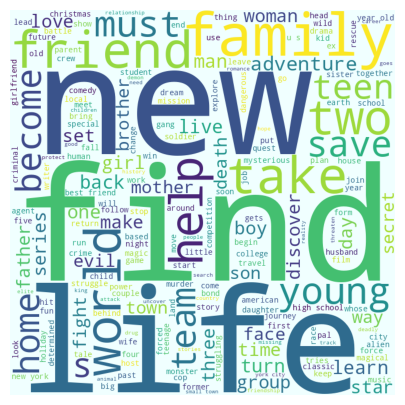

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

*   **Life, love, find, young, new were noticed as keywords in cluster 5**

###**8.3. Hierarchical clustering**

**In k Means we have to define the no of cluster that is k=3 but in
hierarchical clustering takes away the problem of having to pre-define the number of clusters. Uses the agglomerative (hierarchical) clustering process for building clusters.**
**Using the dendrogram to visualize the agglomerative (hierarchical) clustering process to determine the ideal number of clusters.**

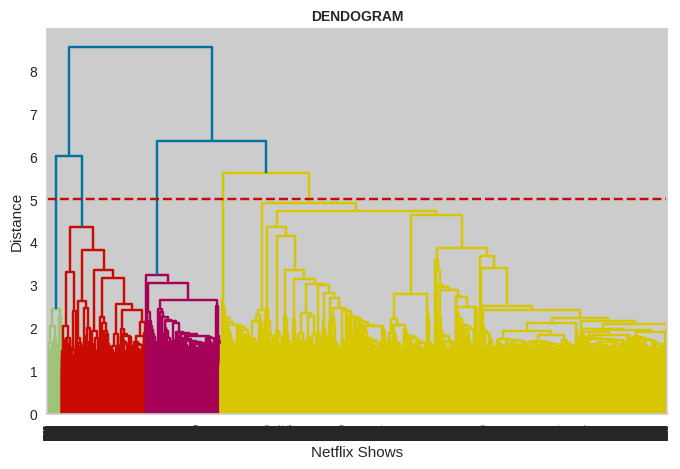

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(8,5))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('DENDOGRAM',fontsize=10, fontweight='bold')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')

**Agglomerative hierarchical clustering:Uses Bottom Up Approach.Suppose there are 4 data points. We will assign clusters to each data points and  hence will have 4 clusters in the beginning.Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left.**


In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 1,  1, 10, ...,  4,  0,  8])

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

Text(0.5, 1.0, 'NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING')

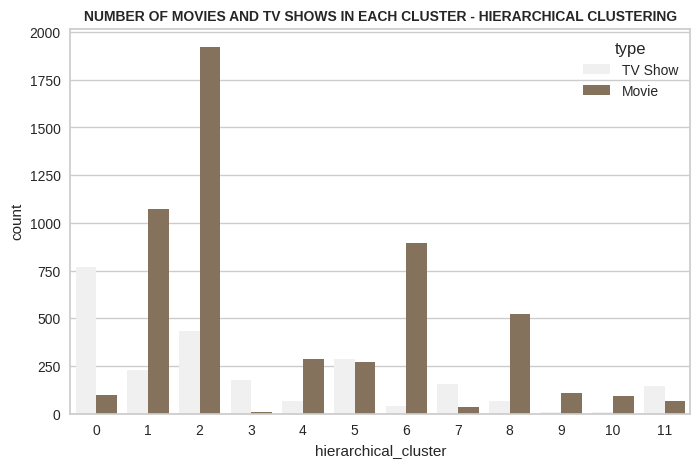

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type',color='#8B7355')
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING',fontsize=10, fontweight='bold')

**Observations:**
*   **Utilising the Agglomerative (hierarchical) clustering algorithm, 12 clusters were successfully built**

###**8.4. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,background_color ='azure',stopwords = stopwords,min_font_size = 8).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8,5))
  plt.imshow(wordcloud)
  plt.axis("off")

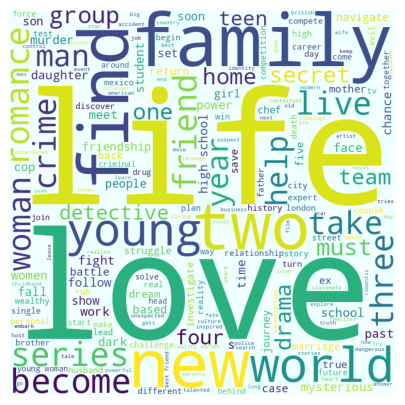

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Love, women, life, hong, kong were the keywords found in cluster 0**

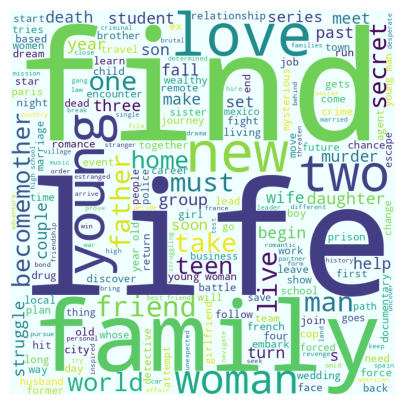

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Find, life, new, family, take were the keywords found in cluster 1**

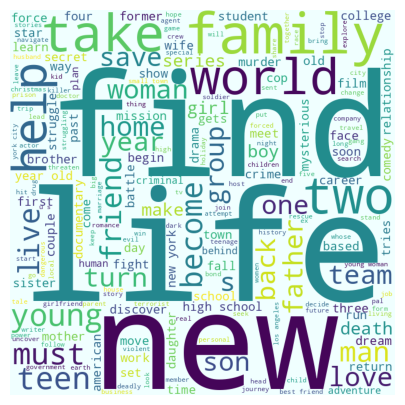

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**world, life, friend, new, family were the keywords found in cluster 2**

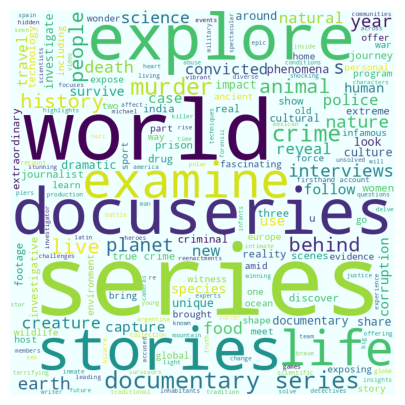

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**life, man, love, find, women were the keywords found in cluster 3**

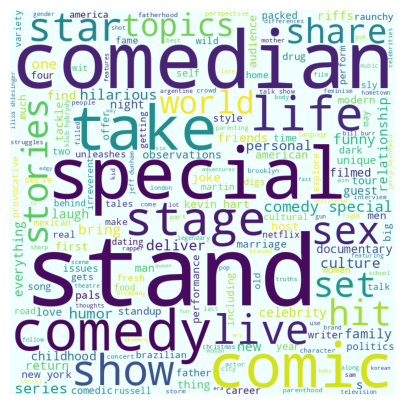

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**documentary, world, interview, history, film were the keywords found in cluster 4**

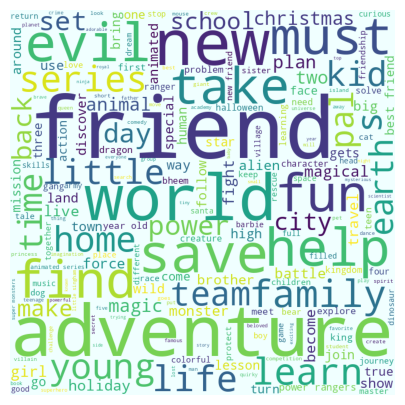

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Love, man, family, women, life were the keywords found in cluster 5**

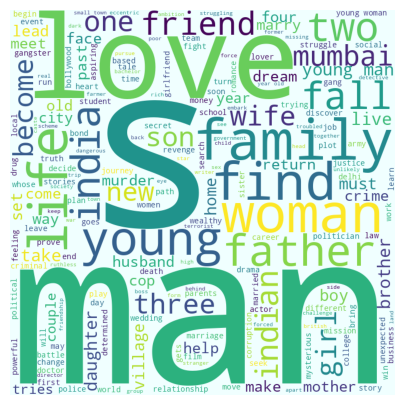

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**man, women, love, family, two were the keywords found in cluster 5**

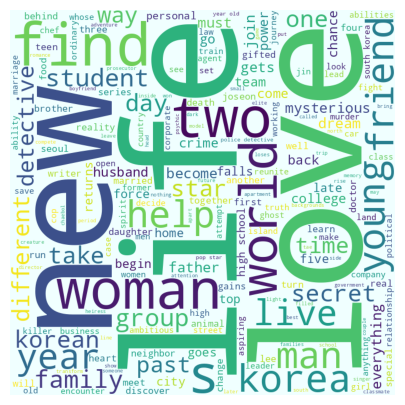

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Love, lite, new, friend, help were the keywords found in cluster 5**

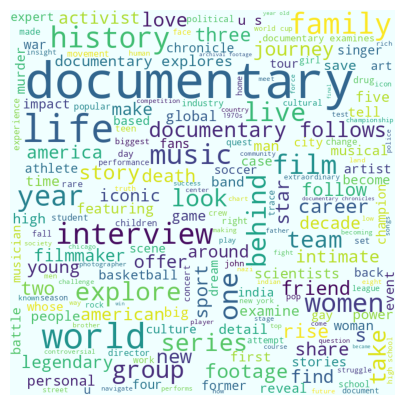

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**documentary, life, interview, world, follows were the keywords found in cluster 7**

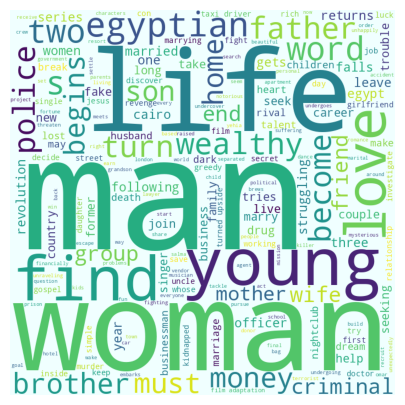

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

**life, women, man, egyptian, young were the keywords found in cluster 5**

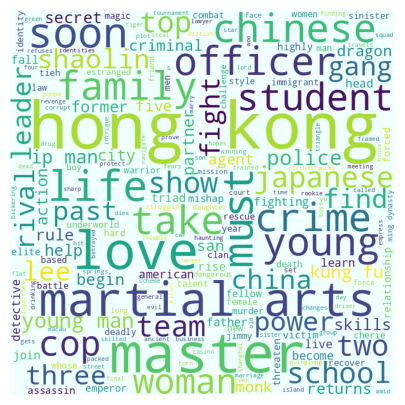

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

**Hong, kong, life, material, arts were the keywords found in cluster 10**

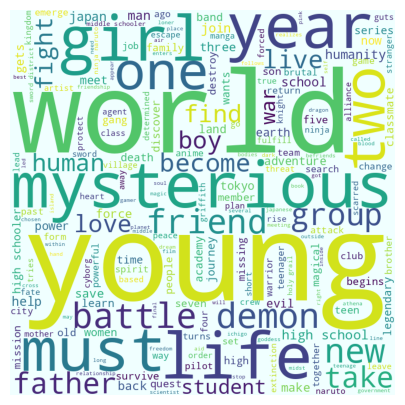

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**world, young, life, year, battle were the keywords found in cluster 11**

#**9. Building Content based recommender system:**

**The objective of a Recommender System is to recommend relevant items for users, based on their preference. If a person has watched a show on netflix, then the recommender system must be able to recommend a list of similar shows.**

In [ ]:
# Changing the index of the df from show id to show title
df['show_id'] = df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df['clustering'] = df['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df.index)

def recommend_top10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)

    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df.index)[i])
    print("If you like this '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'Stranger Things'
recommend_top10('Breaking Bad')

If you like this 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Have You Ever Fallen in Love, Miss Jiang?',
 "Marvel's The Punisher",
 'Get Shorty',
 'MINDHUNTER',
 'Jack Taylor',
 'Travelers',
 'Dare Me',
 'Person of Interest',
 'Love']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_top10('Peaky Blinders')

If you like this 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'London Spy',
 'My Hotter Half',
 'The Murder Detectives',
 'Safe']

In [ ]:
# Recommendations for 'Lucifer'
recommend_top10('Lucifer')

If you like this 'Lucifer', you may also enjoy:



['Get Shorty',
 'The Good Cop',
 'Rica, Famosa, Latina',
 'The Expanding Universe of Ashley Garcia',
 'Better Call Saul',
 'Jack Taylor',
 'Dramaworld',
 'Love Rhythms - Accidental Daddy',
 'L.A.’s Finest',
 "Marvel's Iron Fist"]

In [ ]:
# Recommendations for 'abc'
recommend_top10('fun')

'Invalid Entry'

#**10. Summary and Conclusion:**

**In this project, we tackled a text clustering issue where we had to categorize Netflix shows into specific clusters such that the shows within a cluster are similar to one another and the shows in different clusters are dissimilar to one another.**


*   **Once our dataset is loaded, and then we search for duplicates and missing values. No duplicate values were discovered, and any missing values were used to fill them in. In our dataset, the director column contains the most missing entries, followed by cast, country, and date_added. The string "unknown" is used to fill missing values in the director and country columns, "no cast" is used fill in the cast column, and the mode value is used to fill missing values in the rating column.  the records that had null entries in the "date_added" column were deleted.**

*   **31% of Netflix's content is television shows, while 69% of it is movie show, demonstrating that movie shows have greater content. TV-MA, which stands for "Mature Audience," is the most frequently used classification for movie and tv shows, followed by TV-14, which stands for "Younger Audience." Since the number of movie shows is higher than the number of TV shows, movie shows receive the highest rating when compared to TV shows, from this we can say people like to watch movie show than compare to tv shows.**

*   **Over the years, Netflix has added more shows to its platform. Most movies were released in 2017 and 2018. Most television shows were broadcast in 2019 and 2020. The covid-19-induced lockdowns that stopped the production of shows may be to blame for the decline in the number of movies added in the year 2020. There are fewer movies uploaded this year because the Netflix data we have only extends through 2021.**

*   **Netflix's movie show library is expanding much more quickly than its TV show library. It looks that Netflix has prioritised adding more movie material over TV shows. The growth of movies has been significantly more pronounced than that of TV shows.More content is released over the Christmas season (October, November, December, and January). There are more movies released each month compared to TV shows.Documentaries are the most popular Netflix category, followed by stand-up comedy, dramas, and foreign films. Kids TV is the most well-liked Netflix TV shows.**


*   **The majority of movies durations last between 90 and 120 minutes. Most tv shows have just one season. The lengthiest average runtimes are found in NC-17 rated movies. The average duration of movies with a TV-Y rating is the shortest. The geograph visualisations show that the United States and India are the two countries that produce the most content.**

*   **The director, cast, country, genre, and description are chosen as the attributes to cluster the data based on. These attributes' values underwent tokenization, preprocessing, and vectorization using TFIDF vectorizer. A total of 20000 characteristics were produced through TFIDF vectorization. For the purpose of overcoming the dimensionality curse, we applied Principal Component Analysis (PCA). 4000 components were able to capture more than 80% of variance.**
*   **The ideal number of clusters was found to be six when we first created clusters using the k-means clustering technique. The elbow method and Silhouette score analysis were used to get this result.The Agglomerative clustering technique was then used to create clusters, with 12 being the optimum number. The dendrogram was visualised to achieve this.The similarity matrix acquired after utilising cosine similarity was used to construct a content-based recommender system. Based on the sort of show the user viewed, this recommender system will provide them with 10 recommendations.**

# Thank you !